In [2]:
import pandas as pd
import recursos as rq

# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

# Desafío de regresión

Predecir el precio de venta de una propiedad residencial depende de varios factores, incluida la antigüedad de la propiedad, la disponibilidad de servicios locales y la ubicación.

En este desafío, utilizará un conjunto de datos de transacciones de venta de bienes raíces para predecir el precio por unidad de una propiedad en función de sus características. El precio por unidad en estos datos se basa en una unidad de medida de 3,3 metros cuadrados.

> **Cita**: Los datos utilizados en este ejercicio provienen del siguiente estudio:
>
> *Yeh, I. C. y Hsu, T. K. (2018). Construcción de modelos de valoración inmobiliaria con enfoque comparativo mediante razonamiento basado en casos. Informática blanda aplicada, 65, 260-271.*
>
> Se obtuvo del repositorio de conjuntos de datos de la UCI (Dua, D. y Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University de California, Escuela de Información y Ciencias de la Computación).

## Revisa los datos

Ejecute la siguiente celda para cargar los datos y ver las primeras filas.

In [26]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [27]:
help(rq.distribution_Data)

Help on function distribution_Data in module recursos:

distribution_Data(label)
    Muetra dos visualizaciones: - Distribucion de datos (Histograma)
                                - Diagrama de Caja
    
    label[pd.Series o pd.Dataframe] : Datos que se usaran, debe ser un variable cuantitativa con tipo
                                      de datos float o int. Si:
                                      - label[pd.Dataframe] = Debe contener solo una columna con la variable a usar
                                      - laber[pd.Series]    = No hay inconveniente                                
                                
    NOTA: 
    En grafica de histograma (datos adicionales):
            - Datos minimos y maximos (color: Magenta)
            - Media (color: cyan o celeste)
            - Mediana (color: verde)




Los datos consisten en las siguientes variables:

- **transaction_date**: la fecha de la transacción (por ejemplo, 2013.250=marzo de 2013, 2013.500=junio de 2013, etc.)
- **house_age** - la edad de la casa (en años)
- **transit_distance** - la distancia a la estación de tren ligero más cercana (en metros)
- **local_convenience_stores**: la cantidad de tiendas de conveniencia a poca distancia
- **latitud** - la coordenada geográfica, latitud
- **longitud** - la coordenada geográfica, longitud
- **precio_por_unidad** precio de la vivienda por unidad de superficie (3,3 metros cuadrados)


## ANALISIS EXPLORATORIO DE DATOS

In [28]:
data.columns

Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit'],
      dtype='object')

In [5]:
rq.histogram(df=data,label_x='transaction_date',label_colour='local_convenience_stores')

In [29]:
rq.histogram(data,label_x='local_convenience_stores')

In [30]:
rq.histogram(data,label_x='house_age', nbins=30)

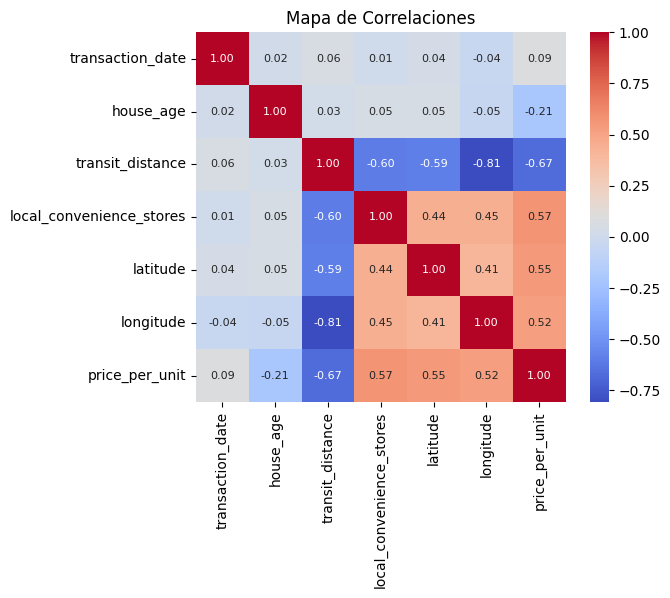

In [8]:
rq.mapa_correlaciones(data)

c:\Users\Lenovo\Documents\DIEGO\Ruta01\13 - Deep Learning Basic\ml-basics\challenges\recursos.py:149: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



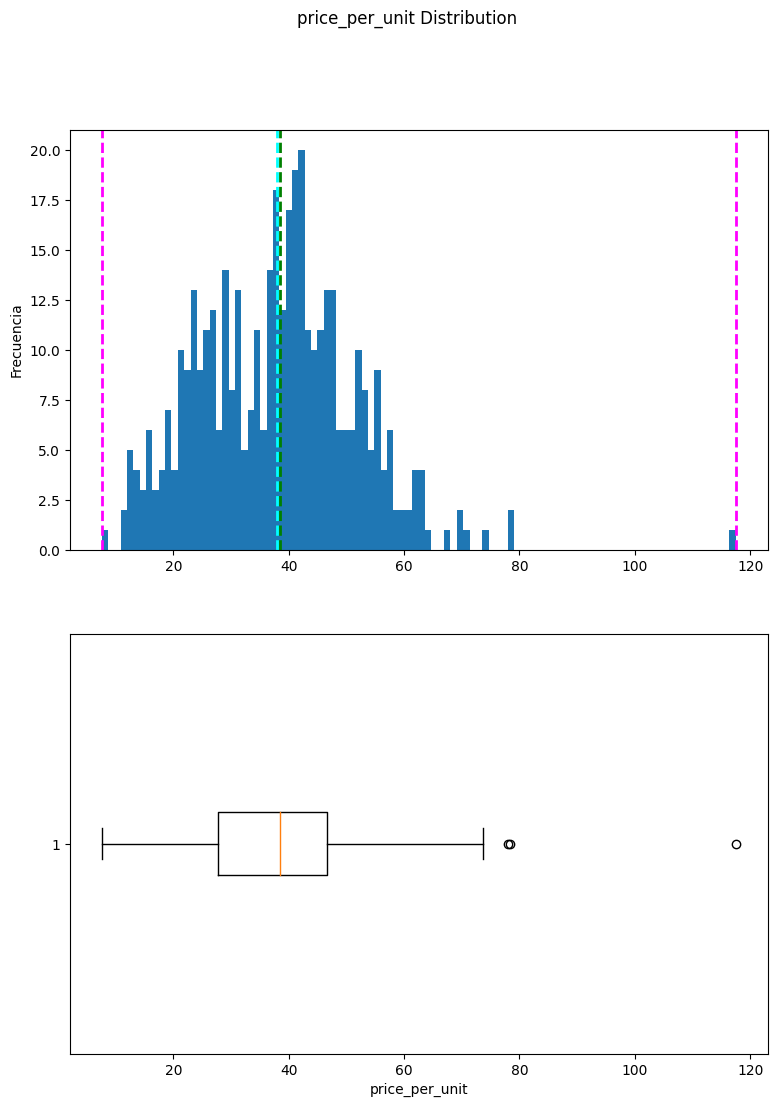

In [9]:
rq.distribution_Data(data['price_per_unit'])

### PREPROCESAMIENTO DE DATOS

In [10]:
help(rq.cut_cuantiles)

Help on function cut_cuantiles in module recursos:

cut_cuantiles(data: pandas.core.frame.DataFrame, name_column: str, rango: float, type_cut: bool = True, less_equal: bool = True)
    Selecciona datos menores o mayores para cierto umbral de cuantiles
    data [Dataframe]   : Set de datos en formato pandas
    name_column [str]   : Nombre de la columna a recortar (debe encontrarse dentro del set de datos)
    type_cut [Bool]     : Tipo de recorte:
                            True --> rangos cuantilicos
                            False --> rangos numericos 
    rangos [float]      : Rango de recorte 
    less_equal [bool]   : Recorte:
                            True  --> menor igual que el rango
                            False --> mayor igual que el rango
    
    Por defecto:
        type_cute --> True, less_equal --> True



In [31]:
data = rq.cut_cuantiles(data,'price_per_unit',type_cut=False,rango=70,less_equal=True)

In [32]:
rq.set_cuantiles(data)

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0.00,2012.667,0.000,23.38284,0.0,24.932070,121.473530,7.60
0.10,2012.750,3.600,157.19690,0.0,24.951200,121.512325,20.90
0.25,2012.917,9.100,289.32480,1.0,24.962990,121.527600,27.30
0.50,2013.167,16.150,492.94415,4.0,24.971100,121.538535,38.25
0.75,2013.417,28.050,1463.12275,6.0,24.977998,121.543222,46.10
0.95,2013.583,37.765,4082.01500,9.0,24.985716,121.549098,57.66
1.00,2013.583,43.800,6488.02100,10.0,25.014590,121.566270,69.70


c:\Users\Lenovo\Documents\DIEGO\Ruta01\13 - Deep Learning Basic\ml-basics\challenges\recursos.py:149: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



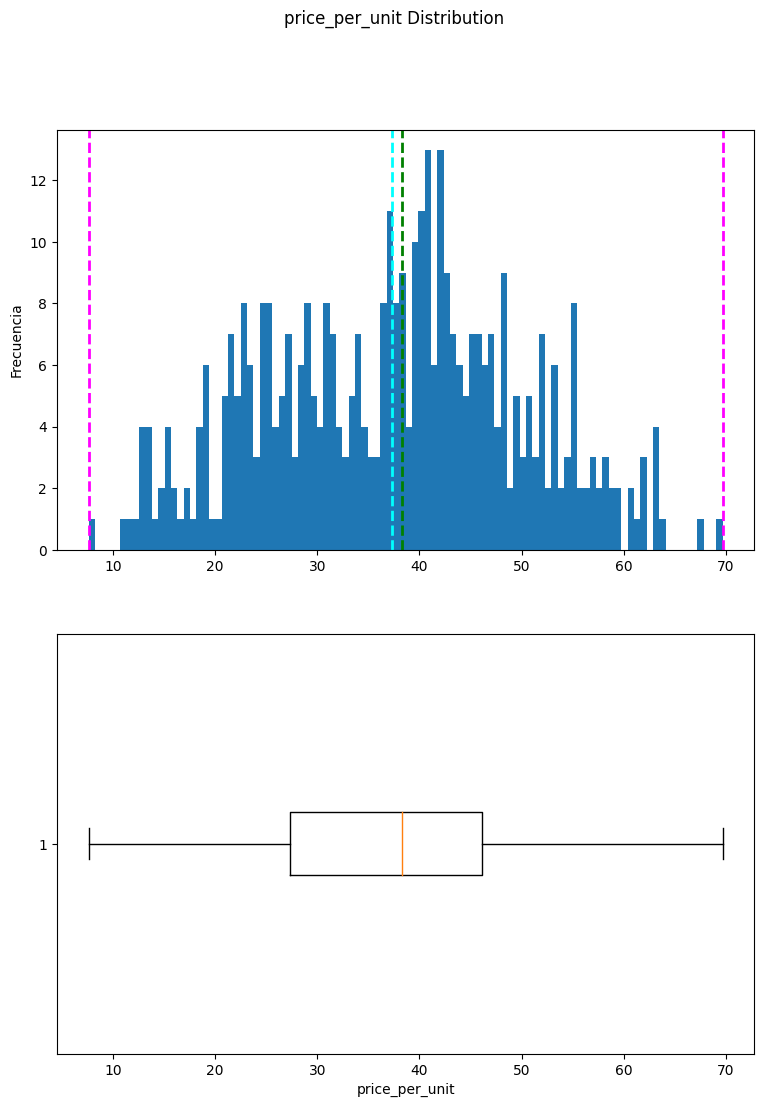

In [33]:
rq.distribution_Data(data['price_per_unit'])


## Entrena un modelo de regresión

Su desafío es explorar y preparar los datos, identificar características predictivas que ayudarán a predecir la etiqueta de **precio_por_unidad** y entrenar un modelo de regresión que logre el error cuadrático medio (RMSE) más bajo que pueda lograr (que debe ser inferior a **7**) cuando se evalúa frente a un subconjunto de datos de prueba.

Agregue celdas de descuento y código según sea necesario para crear su solución.

> **Nota**: No existe una única solución "correcta". Se proporciona una solución de muestra en [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

# Sin datos faltantes

In [34]:
data = pd.read_csv('data/real_estate.csv')
# Datos faltantes
data.isna().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

In [35]:
help(rq.cut_cuantiles)

Help on function cut_cuantiles in module recursos:

cut_cuantiles(data: pandas.core.frame.DataFrame, name_column: str, rango: float, type_cut: bool = True, less_equal: bool = True)
    Selecciona datos menores o mayores para cierto umbral de cuantiles
    data [Dataframe]   : Set de datos en formato pandas
    name_column [str]   : Nombre de la columna a recortar (debe encontrarse dentro del set de datos)
    type_cut [Bool]     : Tipo de recorte:
                            True --> rangos cuantilicos
                            False --> rangos numericos 
    rangos [float]      : Rango de recorte 
    less_equal [bool]   : Recorte:
                            True  --> menor igual que el rango
                            False --> mayor igual que el rango
    
    Por defecto:
        type_cute --> True, less_equal --> True



In [36]:
data = rq.cut_cuantiles(data,'price_per_unit',rango=70,type_cut=False, less_equal=True)
rq.set_cuantiles(data)

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0.00,2012.667,0.000,23.38284,0.0,24.932070,121.473530,7.60
0.10,2012.750,3.600,157.19690,0.0,24.951200,121.512325,20.90
0.25,2012.917,9.100,289.32480,1.0,24.962990,121.527600,27.30
0.50,2013.167,16.150,492.94415,4.0,24.971100,121.538535,38.25
0.75,2013.417,28.050,1463.12275,6.0,24.977998,121.543222,46.10
0.95,2013.583,37.765,4082.01500,9.0,24.985716,121.549098,57.66
1.00,2013.583,43.800,6488.02100,10.0,25.014590,121.566270,69.70


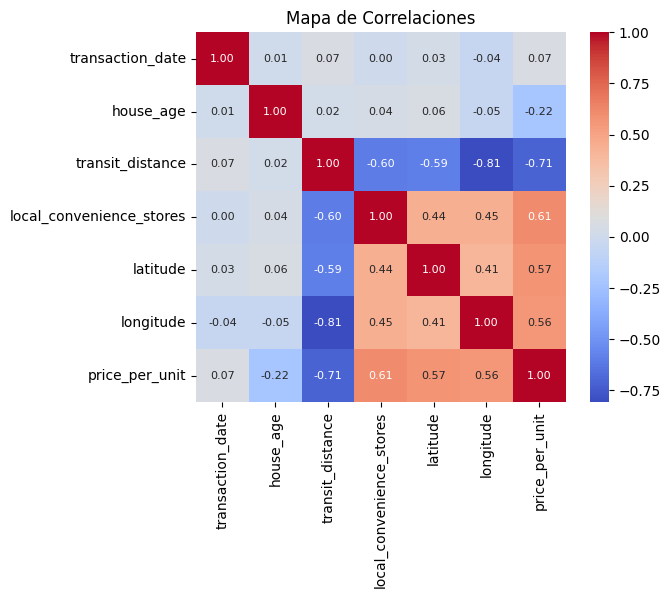

In [37]:
# Volvemos a revisar la correlacion entre datos 
rq.mapa_correlaciones(data)

## DATOS CATEGORICOS

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor

In [49]:
data_x = data[data.columns[1:-1]].values
data_y = data[data.columns[-1]].values

In [56]:
# Division de datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Separate features (columns 1 [house_age] to the last but one) and labels (the last column)
X, y = data[data.columns[1:-1]].values, data[data.columns[-1]].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 285, rows
Test Set: 123 rows


In [57]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,3,4]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


In [58]:
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor())])


class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
 |  
 |  Parameters
 |  ----------
 |  criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
 |      The function to measure the quality of a split. Supported criteria
 |      are "squared_error" for the mean squared error, which is equal to
 |      variance reduction as feature selection criterion and minimizes the L2
 |      loss using the mean of each terminal node, "friedman_mse", which uses
 |      mean squared error with Friedman's improvement score for potential
 |      splits, "absolute_error" for the mean absolute error, which minimizes
 |      the L1 loss using the median of each terminal node, and "poisson" which
 |      uses reduction in Poisson deviance to find splits.
 |  
 |      .. versionadded:: 0.18
 |         Mean Absolute Error (MAE) criterion.

 class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : int, default=100
 |      The number of trees in the forest.
 |  
 |      .. versionchanged:: 0.22
 |         The default value of ``n_estimators`` changed from 10 to 100
 |         in 0.22.
 |  
...
 |      -------
 |      self : estimator instance
 |          Estimator instance.

In [60]:
y_predict = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_predict, y_test)
rmse = np.sqrt(mse)

print('MSE: ',mse)
print('RMSE: ',rmse)

MSE:  36.54087098457283
RMSE:  6.044904547184581


## Usar el modelo entrenado

Guarde su modelo entrenado y luego utilícelo para predecir el precio por unidad para las siguientes transacciones de bienes raíces:

| fecha_transacción | casa_edad | distancia_de_tránsito | tiendas_de_conveniencia_locales | latitud | longitud |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [31]:
# Your code to use the trained model
a = 2